In [1]:
__author__ = "me"
__date__ = "2015_10_13"

%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp

import pylab as plt
import os

from ipynotifyer import notifyOnComplete as nf
import requests
try:
    s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
    plt.rcParams.update(s)
except: 
    pass
PWD = os.getenv('PWD')



Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
!pwd

/Users/casy/Dropbox/CUSP/GRA/QC_GRA/CUSP_QC_twitter_scripts/code/LowerManhattan


In [3]:
dfs = {}
for x in (25, 50, 100, 200):
    path = '../../data/LM/buffer_Data/bufferData%d.csv' % x
    temp = pd.read_csv(path, index_col=0)
    temp['ts'] = pd.to_datetime(temp.ts, format='%Y-%m-%d %H:%M:%S')
    dfs[x] = temp

In [4]:
dfs[200].head(3)

,application,postalCode,ts,AP,Network,range,x,y
36,Instagram,10005,2015-01-01 00:49:35,East Gateway,One Chase Plaza,200,2594856.56686,6034639.69136
775,Twitter for iPhone,10038,2015-01-01 18:20:25,East Gateway,One Chase Plaza,200,2595167.08893,6034783.81589
1086,Twitter for iPhone,10005,2015-01-01 23:02:02,East Gateway,One Chase Plaza,200,2595190.33512,6034587.47106


In [5]:
from weekts import averageWeek, bulkWeeks

In [33]:
# def averageWeek(df, ax=None, tcol='ts', ccol='application', label=None, treshold=0, normalize=True, verbose=False, **kwargs):
#     '''calculate average week on ts'''
    
#     s = df[[tcol, ccol]].rename(columns={tcol:'ts',ccol:'id'}) # rename to convention

#     s = s[['id', 'ts']].set_index('ts').resample('15Min', how='count').reset_index()
#     s['id'] = s['id'].astype(float)


#     s['ts'] = s.ts.apply(lambda x: datetime.datetime(year=2015,month=1, 
#                                                               day=(x.weekday()+1), 
#                                                               hour=x.hour, 
#                                                        minute = x.minute))
    
#     # s = s[s['id']>0] # remove zero 15m samples should concider working on this
#     s = s.groupby(['ts']).agg('mean')
    
#     if not ax:
#         fig, ax = plt.subplots(figsize=(18,6))
    
#     if not label:
#         label = ccol
    
#     if s.id.sum() >= treshold:
        
#         if normalize:
#             sNorm = 1.0*s/s.sum()
#         else:
#             sNorm = s
        
#         sNorm.rename(columns={'id':label}, inplace=1) 
#         sNorm.plot(ax=ax, legend=False, **kwargs);

#         return sNorm.rename(columns={'id':label})
        
#     else:
#         if verbose:
#             print label, 'didnt pass treshhold:', s['id'].sum()

#         pass
    

In [34]:
# def bulkWeeks(df, attr, title='', av=False, th=0, legend=False, **kwargs):
#     fig, ax = plt.subplots(figsize=(18,6))

#     weeks = []


#     for name, g in df.groupby(attr):
#         zs = averageWeek(g, ax=ax, label=name, alpha=.5, treshold=th, **kwargs)
#         weeks.append(zs)
    
#     data = pd.concat(weeks, axis=1)
#     if av:
#         d = data.mean(axis=1)
#         (1.0*d/d.sum()).plot(ax=ax, lw=1.4, color='k', label='Average')


#     ax.set_title('%s, treshold=%d' % (title,th), fontsize=15);
    
#     if legend:
#         ax.legend()

#     labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#     dates = [datetime.datetime(year=2015, month=1, day=i, hour=0, minute=0) for i in range(1,8)]

#     ax.set_xticklabels([],minor=False) # the default
#     ax.set_xticklabels(labels,minor=True)

#     for d in dates:
#         ax.axvline(x=d, ymin=0, ymax=1, alpha=.5, linewidth=4)

#     return data
    
    

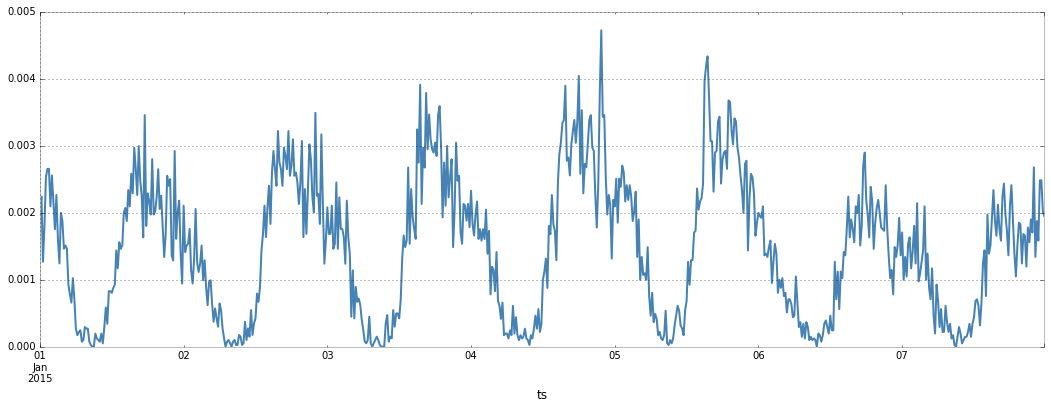

In [6]:
n = averageWeek(dfs[200], ccol='application')

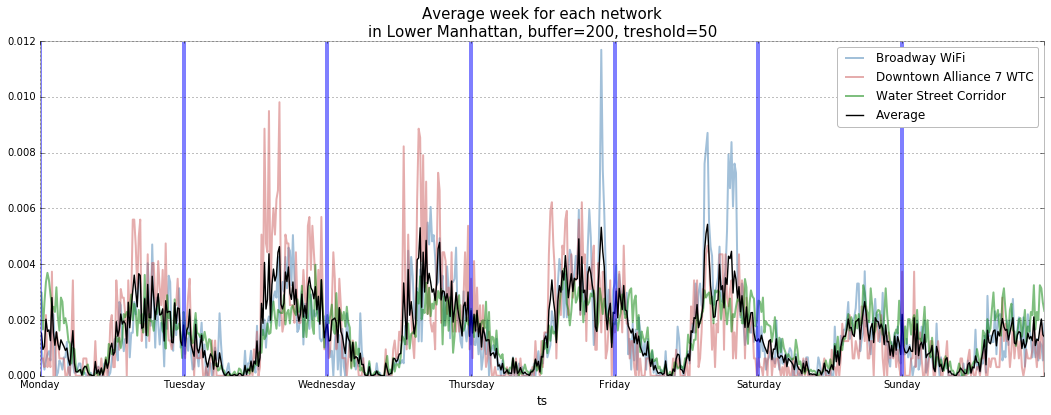

In [11]:
r = 200
x = bulkWeeks(dfs[r], attr='Network', ccol='application',
              title='Average week for each network\nin Lower Manhattan, buffer=%d' %r, 
              av=True, th=50, legend=True)

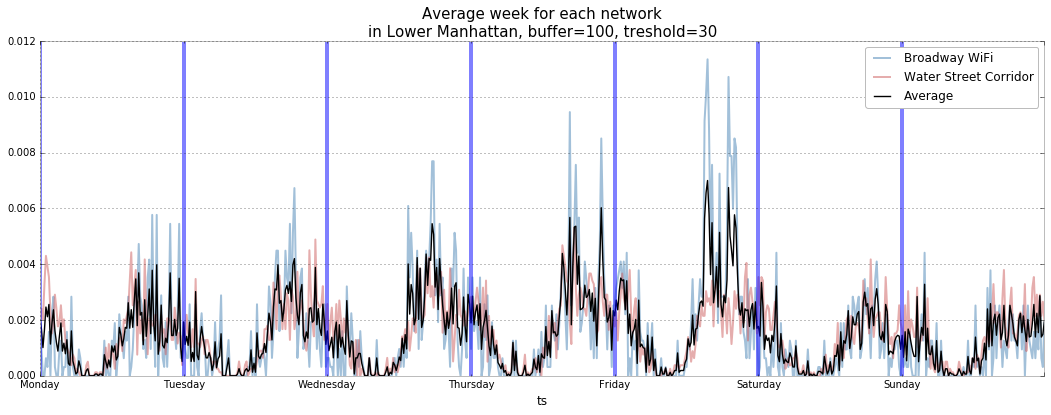

In [13]:
r = 100
x = bulkWeeks(dfs[r], attr='Network', ccol='application', 
              title='Average week for each network\nin Lower Manhattan, buffer=%d' %r, 
              av=True, th=30, legend=True)